In [225]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
from matplotlib.colors import LogNorm, rgb2hex
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams['font.size'] = 18
plt.rc('legend',fontsize=14)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['figure.figsize'] = [6, 3.5]
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.linewidth'] = 1.2

from utils.utils import *
from utils.utils_synthetic import create_network
import utils.HTC_utils as HTC
import utils.dyngdim.dyngdim as dyngdim
from utils.dyngdim.plotting import compute_dim_max, plot_results

import random
from PIL import Image

import networkx as nx

import seaborn as sns
import starbars
from pingouin import partial_corr
import string
#from statannotations.Annotator import Annotator

from scipy.stats import ttest_ind, pearsonr
from scipy.linalg import expm

import os
os.environ["OPENBLAS_NUM_THREADS"] = "30"

folder_results = 'results/'
folder_figures = 'figures/'

color_control = my_cmap(0.6)
color_stroke = 'orange'#my_cmap(0.25)
cs = (color_control, color_stroke)

In [2]:
### GLOBAL VARIABLES
cs = sns.color_palette("deep")

parc = 200
session = 1

directory = folder_results+'dimensionality/'

In [3]:
### LOAD RESULTS
which = 'dimensionality'
ress_dim = load_result(which, var_name='dim', thr='mask', include_subctx=False)

which = 'criticality'
ress_crit = load_result(which, var_name='crit', thr='mask', include_subctx=False)

ress = pd.merge(ress_dim, ress_crit, how='left', left_on=ress_dim.columns[:-2].tolist(), right_on=ress_crit.columns[:-2].tolist())

### GET SPECIFIC PARCELLATION
ress = ress.loc[ress['parc'] == parc].drop(columns='parc')

######## control - ses 01 - parc 100 - total 29 - thr mask - subctx False ########
######## control - ses 01 - parc 200 - total 29 - thr mask - subctx False ########
######## control - ses 01 - parc 500 - total 29 - thr mask - subctx False ########
######## stroke - ses 01 - parc 100 - total 51 - thr mask - subctx False ########
######## stroke - ses 01 - parc 200 - total 51 - thr mask - subctx False ########
######## stroke - ses 01 - parc 500 - total 51 - thr mask - subctx False ########
######## control - ses 01 - parc 100 - total 29 - thr mask - subctx False ########
######## control - ses 01 - parc 200 - total 29 - thr mask - subctx False ########
######## control - ses 01 - parc 500 - total 29 - thr mask - subctx False ########
######## stroke - ses 01 - parc 100 - total 51 - thr mask - subctx False ########
######## stroke - ses 01 - parc 200 - total 51 - thr mask - subctx False ########
######## stroke - ses 01 - parc 500 - total 51 - thr mask - subctx False ########


In [4]:
### Get controls
control = data_loader(which='control', ses=session, parc=parc, include_subctx=False, thr='mask')
stroke = data_loader(which='stroke', ses=session, parc=parc, include_subctx=False, thr='mask')

dim_control_names = ress.loc[ress['name']=='control']['sub'].values
dim_stroke_names = ress.loc[ress['name']=='stroke']['sub'].values

dim_control = ress.loc[ress['name'] == 'control']['dim_avg'].values
dim_stroke = ress.loc[ress['name'] == 'stroke']['dim_avg'].values

dim_controls_local = ress.loc[ress['name']=='control']['dim_all'].values
dim_controls_local = np.stack(dim_controls_local)

dim_stroke_local = ress.loc[ress['name']=='stroke']['dim_all'].values
dim_stroke_local = np.stack(dim_stroke_local)

######## control - ses 01 - parc 200 - total 29 - thr mask - subctx False ########
######## stroke - ses 01 - parc 200 - total 51 - thr mask - subctx False ########


# Compute additional graph theoretic measures

In [234]:
import pickle
from scipy.linalg import expm

results = {}

tmp_dicts = [dict_control, dict_stroke]

for tmp_dict in tmp_dicts:
    which = tmp_dict['name']   # e.g. 'control', 'stroke'
    results[which] = []

    # Load dataset
    data = data_loader(
        which=which,
        ses=session,
        parc=parc,
        thr='mask',
        include_subctx=False
    )

    for subj_idx, mat in enumerate(data):
        if mat is None:
            continue

        # Normalize weights
        mat = mat / mat.max()

        # Graphs
        G = nx.from_numpy_array(mat)

        mat_dist = np.zeros_like(mat)
        mat_dist[mat > 0] = 1.0 / mat[mat > 0]
        Gd = nx.from_numpy_array(mat_dist)

        # ----- Metrics -----
        # Strength
        strength = mat.sum(axis=0)

        # Eigenvector centrality
        eigcent = nx.eigenvector_centrality_numpy(G, weight='weight')
        eigcent = np.array(list(eigcent.values()))

        # Betweenness
        betw = nx.betweenness_centrality(Gd, weight='weight')
        betw = np.array(list(betw.values()))

        # Closeness
        close = nx.closeness_centrality(Gd, distance='weight')
        close = np.array(list(close.values()))

        # Communicability
        comm_mat = expm(mat) #nx.to_numpy_array(nx.communicability_exp(G))
        comm_diag = np.diag(comm_mat)
        comm_node = comm_mat.sum(axis=0)

        # ----- Store subject results -----
        results[which].append({
            'subject_idx': subj_idx,
            'strength': strength,
            'eigcent': eigcent,
            'betw': betw,
            'close': close,
            'comm_node': comm_node,
            'comm_diag': comm_diag
        })

# ----- Save to pickle -----
out_file = f"results/structural_metrics_{parc}_{session}.pkl"
with open(out_file, "wb") as f:
    pickle.dump(results, f)

print(f"Saved results to {out_file}")

######## control - ses 01 - parc 200 - total 29 - thr mask - subctx False ########
- Loading sub-040
- Loading sub-041
- Loading sub-042
- Loading sub-043
- Loading sub-044
- Loading sub-045
- Loading sub-046
- Loading sub-047
- Loading sub-048
- Loading sub-049
- Loading sub-050
- Loading sub-051
- Loading sub-052
- Loading sub-055
- Loading sub-057
- Loading sub-059
- Loading sub-060
- Loading sub-061
- Loading sub-062
- Loading sub-063
- Loading sub-064
- Loading sub-065
- Loading sub-066
- Loading sub-067
- Loading sub-068
- Loading sub-069
- Loading sub-070
- Loading sub-071
- Loading sub-072
######## stroke - ses 01 - parc 200 - total 51 - thr mask - subctx False ########
- Loading sub-200
- Loading sub-201
- Loading sub-202
- Loading sub-203
- Loading sub-204
- Loading sub-205
- Loading sub-206
- Loading sub-208
- Loading sub-209
- Loading sub-210
- Loading sub-213
- Loading sub-216
- Loading sub-219
- Loading sub-222
- Loading sub-224
- Loading sub-226
- Loading sub-227
- Loadi

In [235]:
from scipy.stats import spearmanr

def subjectwise_metric_dim_corr(results_group, dim_local, metric_name):
    """
    results_group : list of dicts (one per subject)
    dim_local     : np.ndarray (n_subj, Nroi)
    metric_name   : str
    """
    corrs = []
    pvals = []

    for i, subj in enumerate(results_group):
        x = subj[metric_name]
        y = dim_local[i]

        mask = np.isfinite(x) & np.isfinite(y)

        rho, p = spearmanr(x[mask], y[mask])
        corrs.append(rho)
        pvals.append(p)

    return np.array(corrs), np.array(pvals)


def subjectwise_metric_dim_corr_shuffled(
    results_group,
    dim_local,
    metric_name,
    n_shuffle=1000,
    random_state=None
):
    rng = np.random.default_rng(random_state)

    corrs_real = []
    corrs_null = []

    for i, subj in enumerate(results_group):
        x = subj[metric_name]
        y = dim_local[i]

        mask = np.isfinite(x) & np.isfinite(y)
        x = x[mask]
        y = y[mask]

        # Real correlation
        rho_real, _ = spearmanr(x, y)
        corrs_real.append(rho_real)

        # Shuffled null
        rho_shuff = np.zeros(n_shuffle)
        for k in range(n_shuffle):
            y_perm = rng.permutation(y)
            rho_shuff[k], _ = spearmanr(x, y_perm)

        corrs_null.append(rho_shuff)

    return np.array(corrs_real), np.array(corrs_null)

from scipy.stats import wilcoxon, mannwhitneyu

def real_vs_null_test(corrs_real, corrs_null):
    delta = corrs_real - np.median(corrs_null, axis=1)
    stat, p = wilcoxon(delta)
    return delta, p


def group_difference_test(delta_control, delta_stroke):
    stat, p = mannwhitneyu(
        delta_control,
        delta_stroke,
        alternative='two-sided'
    )
    return p

In [236]:
metrics = [
    'strength',
    'eigcent',
    'betw',
    'close',
    'comm_node',
    'comm_diag'
]

corrs_control = {}
corrs_stroke = {}

for m in metrics:
    corrs_control[m], _ = subjectwise_metric_dim_corr(
        results['control'], dim_controls_local, m
    )

    corrs_stroke[m], _ = subjectwise_metric_dim_corr(
        results['stroke'], dim_stroke_local, m
    )

In [237]:
corrs_control_real = {}
corrs_control_null = {}

corrs_stroke_real = {}
corrs_stroke_null = {}

for m in metrics:
    print(f'[*] {m}')
    corrs_control_real[m], corrs_control_null[m] = (
        subjectwise_metric_dim_corr_shuffled(
            results['control'],
            dim_controls_local,
            m,
            n_shuffle=100,
            random_state=0
        )
    )

    corrs_stroke_real[m], corrs_stroke_null[m] = (
        subjectwise_metric_dim_corr_shuffled(
            results['stroke'],
            dim_stroke_local,
            m,
            n_shuffle=100,
            random_state=0
        )
    )

[*] strength
[*] eigcent
[*] betw
[*] close
[*] comm_node
[*] comm_diag


In [238]:
delta_control, p_control = real_vs_null_test(
    corrs_control_real[m],
    corrs_control_null[m]
)

delta_stroke, p_stroke = real_vs_null_test(
    corrs_stroke_real[m],
    corrs_stroke_null[m]
)

p_group = group_difference_test(delta_control, delta_stroke)

stats_summary = {}

for m in metrics:
    delta_c, p_c = real_vs_null_test(
        corrs_control_real[m],
        corrs_control_null[m]
    )

    delta_s, p_s = real_vs_null_test(
        corrs_stroke_real[m],
        corrs_stroke_null[m]
    )

    p_group = group_difference_test(delta_c, delta_s)

    stats_summary[m] = {
        'p_control_vs_null': p_c,
        'p_stroke_vs_null': p_s,
        'p_control_vs_stroke_delta': p_group
    }

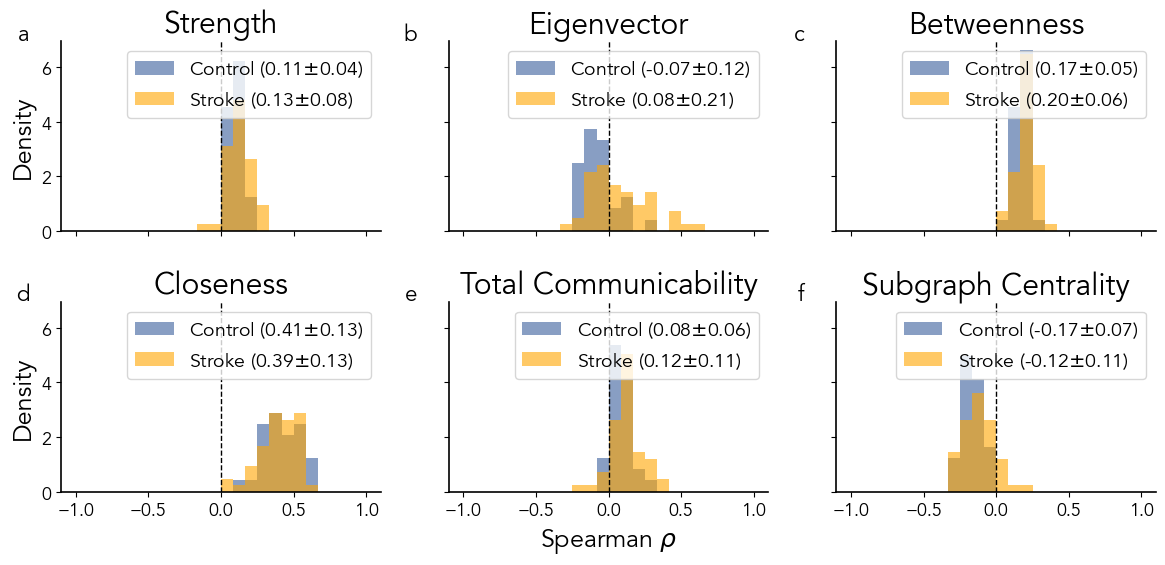

In [245]:
metrics = [
    'strength',
    'eigcent',
    'betw',
    'close',
    'comm_node',
    'comm_diag'
]

titles = [
    'Strength',
    'Eigenvector',
    'Betweenness',
    'Closeness',
    r'Total Communicability',
    r'Subgraph Centrality'
]

n_metrics = len(metrics)
n_cols = 3
n_rows = int(np.ceil(n_metrics / n_cols))

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4 * n_cols, 3 * n_rows),
    sharex=True,
    sharey=True
)

axes = axes.ravel()

bins = np.linspace(-1, 1, 25)

for idx, (ax, m) in enumerate(zip(axes, metrics)):
    # Control
    ax.hist(
        corrs_control[m],
        bins=bins,
        density=True,
        alpha=0.6,
        color=color_control,
        #label='Control'
        label=fr'Control ({corrs_control[m].mean():.2f}$\pm${corrs_control[m].std():.2f})'
    )

    # Stroke
    ax.hist(
        corrs_stroke[m],
        bins=bins,
        density=True,
        alpha=0.6,
        color=color_stroke,
        #label='Stroke'
        label=fr'Stroke ({corrs_stroke[m].mean():.2f}$\pm${corrs_stroke[m].std():.2f})'
    )
    
    # Shuffled null (pooled across subjects)
    '''
    null_all = np.concatenate(corrs_control_null[m])
    lo, hi = np.percentile(null_all, [2.5, 97.5])
    med = np.median(null_all)

    ax.axvspan(lo, hi, color='k', alpha=0.15, label='Shuffled')
    ax.axvline(med, color='k', linestyle='--', linewidth=2)
    
    p_c, p_s = stats_summary[m]['p_control_vs_null'], stats_summary[m]['p_stroke_vs_null']
    
    ax.text(
        0.05, 0.92,
        f"C>null: p={p_c:.2e}\nS>null: p={p_s:.2e}",
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top'
    )
    '''

    # Labels and others
    ax.axvline(0, linestyle='--', linewidth=1, c='k')
    ax.set_title(titles[idx])
    
    #if idx == 0:
    ax.legend()
    
    if idx % n_cols == 0:
        ax.set_ylabel('Density')
    if idx == 4:
        ax.set_xlabel(r'Spearman $\rho$')
        
for i, ax in enumerate(axes):
    # transform=ax.transAxes uses coordinates from 0 to 1 relative to the subplot
    ax.text(-0.1, 1.1, string.ascii_lowercase[i], 
            transform=ax.transAxes,
            fontsize=16,
            fontweight='bold', 
            va='top',
            ha='right')
    
sns.despine()
    
plt.tight_layout()
plt.savefig(folder_figures+'fig_suppl_centralities.png', dpi=200, bbox_inches='tight')
plt.show()

# Compute network properties for rewired networks

In [45]:
from netneurotools.networks import strength_preserving_rand_sa_mse_opt, randmio_und

import pickle

t_min = 0
t_max = 2
n_t = 50
n_workers = 25

times = np.logspace(t_min, t_max, n_t)

results = {}

tmp_dicts = [dict_control, dict_stroke]

for tmp_dict in tmp_dicts:
    which = tmp_dict['name']   # e.g. 'control', 'stroke'
    results[which] = []

    # Load dataset
    data = data_loader(
        which=which,
        ses=session,
        parc=parc,
        thr='mask',
        include_subctx=False
    )

    for subj_idx, mat in enumerate(data):
        if mat is None:
            continue

        # Normalize weights
        mat = mat / mat.max()

        # Run network randomization
        mat_rand = randmio_und(mat, 10)[0]
        mat_degree = strength_preserving_rand_sa_mse_opt(mat)[0]
        
        # Compute dimensions
        local_dimensions = dyngdim.run_local_dimension(nx.from_numpy_array(mat_rand), times, n_workers=n_workers, use_spectral_gap=False)
        dim_rand, dim_all_rand = compute_dim_max(local_dimensions)
        
        local_dimensions = dyngdim.run_local_dimension(nx.from_numpy_array(mat_degree), times, n_workers=n_workers, use_spectral_gap=False)
        dim_deg, dim_all_deg = compute_dim_max(local_dimensions)
        
        # ----- Store subject results -----
        results[which].append({
            'dim_rand': dim_all_rand,
            'dim_degree_pres': dim_all_deg,
        })

# ----- Save to pickle -----
out_file = f"results/randomized_metrics_{parc}_{session}.pkl"
with open(out_file, "wb") as f:
    pickle.dump(results, f)

print(f"Saved results to {out_file}")

######## control - ses 01 - parc 200 - total 29 - thr mask - subctx False ########
- Loading sub-040


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.73it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-041


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.34it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-042


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.58it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-043


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.31it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-044


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.72it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-045


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.33it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-046


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.46it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-047


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.55it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-048


annealing progress: 100%|██████████| 100/100 [00:38<00:00,  2.62it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-052


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.72it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-055


annealing progress: 100%|██████████| 100/100 [00:38<00:00,  2.63it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-057


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.31it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-059


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.49it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-060


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.50it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-061


annealing progress: 100%|██████████| 100/100 [00:37<00:00,  2.66it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-062


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.40it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-063


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  7.93it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-064


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.38it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-065


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.75it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-066


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.30it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-067


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.22it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-068


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.39it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-069


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.06it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-070


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.20it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-071


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.30it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-072


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  7.71it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

######## stroke - ses 01 - parc 200 - total 51 - thr mask - subctx False ########
- Loading sub-200


annealing progress: 100%|██████████| 100/100 [00:37<00:00,  2.66it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-201


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.30it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-202


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  7.87it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-203


annealing progress: 100%|██████████| 100/100 [00:37<00:00,  2.69it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-204


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.31it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-205


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.18it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-206


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.07it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-208


annealing progress: 100%|██████████| 100/100 [00:39<00:00,  2.51it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-209


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.48it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-210


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  7.89it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-213


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.39it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-216


annealing progress:  96%|█████████▌| 96/100 [00:35<00:00,  5.69it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.75it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarnin

- Loading sub-250


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.27it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-251


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.72it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-252


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.01it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-253


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.24it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-256


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.72it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-260


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  7.82it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-261


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  7.99it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-262


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.74it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-263


annealing progress: 100%|██████████| 100/100 [00:11<00:00,  8.42it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-264


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.13it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-265


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.71it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-266


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.23it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-267


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.29it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-268


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  7.99it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-269


annealing progress: 100%|██████████| 100/100 [00:37<00:00,  2.68it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-272


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.17it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-273


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.26it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-274


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.30it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-275


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.07it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-277


annealing progress: 100%|██████████| 100/100 [00:12<00:00,  8.19it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-279


annealing progress: 100%|██████████| 100/100 [00:36<00:00,  2.71it/s]
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Strok

- Loading sub-280
Saved results to results/structural_metrics_200_1.pkl


### Correlates with axis and myelin & RSN

In [111]:
### Compute avg by RSN

# Get ROIs
rois = control.get_rois()
coords = rois[['R','A','S']].values

roi_rsn = rois['ROI Name'].values
roi_rsn = np.array( [tmp.split('_')[2] for tmp in roi_rsn] )
rsn_names = np.unique(roi_rsn).astype(str)
print(rsn_names)

rsn_idx = [np.where(roi_rsn==tmp)[0] for tmp in rsn_names]

#avg_dim = np.array( [dim_local_avg[tmp_idx].mean() for tmp_idx in rsn_idx] )
avg_dim = [dim_controls_local[:,tmp_idx].mean(axis=1) for tmp_idx in rsn_idx]
avg_dim = np.stack( avg_dim )

new_rsn_names = np.array( ['Fp', 'Dmn', 'Da', 'Lim', 'Va', 'Sm', 'Vis'] )
print(new_rsn_names)

avg_dim_rsn = pd.DataFrame(avg_dim.T, columns=new_rsn_names)

idx_to_plot = np.argsort(avg_dim.mean(axis=1))#[::-1]
avg_dim_rsn = avg_dim_rsn[new_rsn_names[idx_to_plot]]

['Cont' 'Default' 'DorsAttn' 'Limbic' 'SalVentAttn' 'SomMot' 'Vis']
['Fp' 'Dmn' 'Da' 'Lim' 'Va' 'Sm' 'Vis']


In [46]:
### Load myelin
from neuromaps.datasets import fetch_annotation, available_annotations
from netneurotools import datasets as nntdata
from neuromaps.parcellate import Parcellater
from neuromaps.images import dlabel_to_gifti
from neuromaps.transforms import fslr_to_fslr
from enigmatoolbox.permutation_testing import spin_test, shuf_test

### Download parcellation
schaefer = nntdata.fetch_schaefer2018('fslr32k')[f'{parc}Parcels7Networks']

### Create parcellator
parcellator = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')

### Download map
myelinmap = fetch_annotation(source='hcps1200', desc='myelinmap')

### Parcellate
myelin_parc = parcellator.fit_transform(myelinmap, 'fsLR')

Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [113]:
dim_rsn = [dim_controls_local[:,tmp_idx].mean(axis=1) for tmp_idx in rsn_idx]
dim_rsn = np.stack( dim_rsn )
dim_rsn = pd.DataFrame(dim_rsn.T, columns=new_rsn_names)

idx_to_plot = np.argsort(avg_dim.mean(axis=1))#[::-1]
dim_rsn = dim_rsn[new_rsn_names[idx_to_plot]]
dim_rsn['type'] = 'Empirical'

dim_rsn_rand = [dim_rand_control[:,tmp_idx].mean(axis=1) for tmp_idx in rsn_idx]
dim_rsn_rand = np.stack( dim_rsn_rand )
dim_rsn_rand = pd.DataFrame(dim_rsn_rand.T, columns=new_rsn_names)
dim_rsn_rand['type'] = 'Maslov-Sneppen'

dim_rsn_deg = [dim_deg_control[:,tmp_idx].mean(axis=1) for tmp_idx in rsn_idx]
dim_rsn_deg = np.stack( dim_rsn_deg )
dim_rsn_deg = pd.DataFrame(dim_rsn_deg.T, columns=new_rsn_names)
dim_rsn_deg['type'] = 'Degree-preserving'

dim_rsn_all = pd.concat([dim_rsn, dim_rsn_rand, dim_rsn_deg])

In [116]:
df_long = dim_rsn_all.melt(
    id_vars=['type'], 
    value_vars=['Lim', 'Vis', 'Sm', 'Dmn', 'Da', 'Va', 'Fp'],
    var_name='rsn', 
    value_name='value'
)

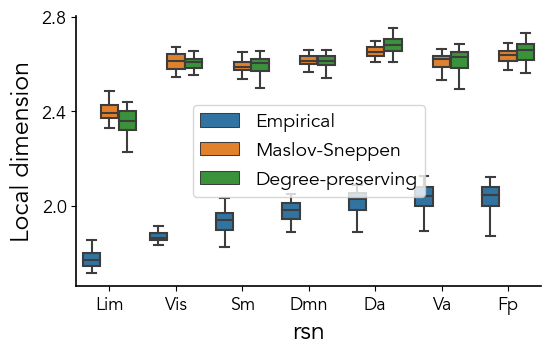

In [121]:
ax = plt.subplot(1,1,1)

sns.boxplot(data=df_long, hue='type', x='rsn', y='value', fliersize=0, ax=ax, zorder=2)
#sns.stripplot(data=avg_dim_rsn, dodge=True, alpha=1.0, jitter=0.2, edgecolor='gray', linewidth=1, palette="rocket_r", ax=ax, zorder=1)
sns.despine(bottom=False, ax=ax)
ax.set_ylabel('Local dimension')
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

ax.legend()

plt.show()

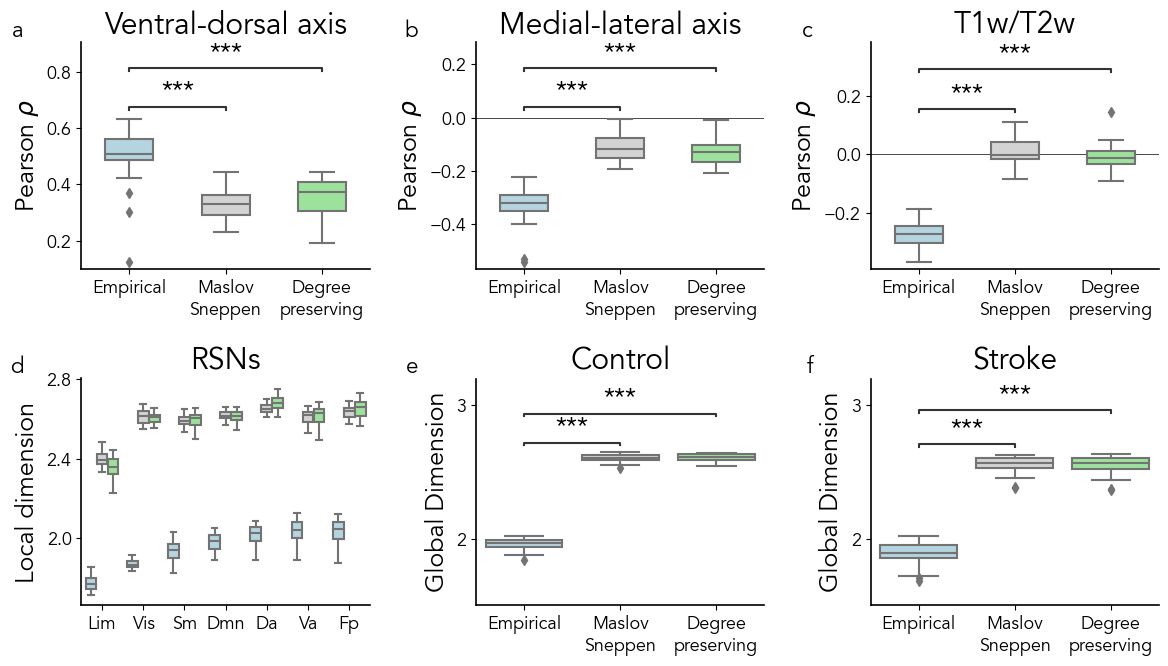

In [233]:
from scipy.stats import pearsonr
from statannotations.Annotator import Annotator

cs_rand = ['lightblue', 'lightgray', 'lightgreen']

dim_rand_control = np.array( [tmp['dim_rand'] for tmp in results['control'] ] )
dim_deg_control = np.array( [tmp['dim_degree_pres'] for tmp in results['control'] ] )

dim_rand_stroke = np.array( [tmp['dim_rand'] for tmp in results['stroke'] ] )
dim_deg_stroke = np.array( [tmp['dim_degree_pres'] for tmp in results['stroke'] ] )

data_x = [coords[:,2], np.abs(coords[:,0]), myelin_parc]
titles = ['Ventral-dorsal axis', 'Medial-lateral axis', 'T1w/T2w']

fig, axs = plt.subplots(2, len(data_x), figsize=(12,7))
axs = axs.flatten()

### Relation w Anatomical axes and myelin
for idx in range(len(data_x)):
    ax = axs[idx]
    
    x = data_x[idx]
    
    rho_avg = np.array( [ pearsonr(x, dim_controls_local[idx])[0] for idx in range(dim_controls_local.shape[0]) ])
    rho_rand = np.array( [ pearsonr(x, dim_rand_control[idx])[0] for idx in range(dim_controls_local.shape[0]) ])
    rho_deg = np.array( [ pearsonr(x, dim_deg_control[idx])[0] for idx in range(dim_controls_local.shape[0]) ])
    
    x_name, y_name = 'Null Model', 'Pearson correlation'
    
    df_corr = pd.DataFrame({
        'Empirical': rho_avg,
        'Maslov\nSneppen': rho_rand,
        'Degree\npreserving': rho_deg,
    }).melt(var_name=x_name, value_name=y_name)
    
    sns.boxplot(
        data=df_corr, 
        x=x_name, 
        y=y_name, 
        ax=ax, 
        palette=cs_rand,
        width=0.5
    )
    
    pairs = [
        ("Empirical", "Maslov\nSneppen"),
        ("Empirical", "Degree\npreserving")
    ]

    annotator = Annotator(ax, pairs, data=df_corr, x=x_name, y=y_name)
    annotator.configure(test='Wilcoxon', text_format='star', loc='inside', verbose=0, pvalue_thresholds=[[0.001, "***"],[0.01, "**"],[0.05, "*"],[1, "ns"]])
    annotator.apply_and_annotate()
    
    #sns.boxplot([ rho_deg, rho_rand, rho_avg ], ax=ax, palette=cs_rand[::-1])
    ax.set_title(titles[idx])
    ax.set_ylabel(r'Pearson $\rho$')
    ax.set_xlabel('')
    ax.axhline(0, c='k', lw=0.5, zorder=-1)
    #ax.legend(labels=['Empirical', 'Maslov-Sneppen', 'Degree-preserving'])
    
### Relation w RSN
ax = axs[len(data_x)]

sns.boxplot(data=df_long, hue='type', x='rsn', y='value', fliersize=0, ax=ax, zorder=2, palette=cs_rand)
#sns.stripplot(data=avg_dim_rsn, dodge=True, alpha=1.0, jitter=0.2, edgecolor='gray', linewidth=1, palette="rocket_r", ax=ax, zorder=1)
sns.despine(bottom=False, ax=ax)
ax.set_ylabel('Local dimension')
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
ax.legend()
ax.set_xlabel('')
ax.set_title('RSNs')

### Global dimension - controls
ax = axs[-2]

data_dict = {
    'Empirical': dim_controls_local.mean(axis=1),
    'Maslov\nSneppen': dim_rand_control.mean(axis=1),
    'Degree\npreserving': dim_deg_control.mean(axis=1)
}

x_name, y_name = 'Group', 'Global Dimension'

df_nulls = pd.DataFrame(data_dict).melt(var_name=x_name, value_name=y_name)

sns.boxplot(data=df_nulls, x=x_name, y=y_name, ax=ax, palette=cs_rand)

pairs = [
        ("Empirical", "Maslov\nSneppen"),
        ("Empirical", "Degree\npreserving")
]

annotator = Annotator(ax, pairs, data=df_nulls, x=x_name, y=y_name)
annotator.configure(test='Wilcoxon', text_format='star', loc='inside', verbose=0, pvalue_thresholds=[[0.001, "***"],[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate()

ax.set_xlabel('')
ax.set_ylim(1.5, 3.2)
ax.set_yticks([2, 3])
ax.set_title('Control')

### Global dimension - stroke
ax = axs[-1]

data_dict = {
    'Empirical': np.nanmean(dim_stroke_local, axis=1),
    'Maslov\nSneppen': np.nanmean(dim_rand_stroke, axis=1),
    'Degree\npreserving': np.nanmean(dim_deg_stroke, axis=1)
}

df_nulls = pd.DataFrame(data_dict).melt(var_name=x_name, value_name=y_name)

sns.boxplot(data=df_nulls, x=x_name, y=y_name, ax=ax, palette=cs_rand)

annotator = Annotator(ax, pairs, data=df_nulls, x=x_name, y=y_name)
annotator.configure(test='Wilcoxon', text_format='star', loc='inside', verbose=0, pvalue_thresholds=[[0.001, "***"],[0.01, "**"],[0.05, "*"],[1, "ns"]])
annotator.apply_and_annotate()

ax.set_xlabel('')
ax.set_ylim(1.5, 3.2)
ax.set_yticks([2, 3])
ax.set_title('Stroke')

#handles, labels = axs[3].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

axs[3].legend_ = None

for i, ax in enumerate(axs):
    # transform=ax.transAxes uses coordinates from 0 to 1 relative to the subplot
    ax.text(-0.2, 1.1, string.ascii_lowercase[i], 
            transform=ax.transAxes, 
            fontsize=16,
            fontweight='bold', 
            va='top',
            ha='right')
    
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig(folder_figures+'fig_suppl_randomized.png', dpi=200, bbox_inches='tight')
plt.show()

In [224]:
from scipy.stats import spearmanr

# 1. Aggregate without creating a messy MultiIndex
df_rsn_avg = df_long.groupby(['rsn', 'type'])['value'].mean().reset_index()

# 2. Separate the vectors for comparison
# Let's assume you want to compare 'Empirical' against 'Type0' (or another type in your data)
vec_empirical = df_rsn_avg[df_rsn_avg['type'] == 'Empirical'].sort_values('rsn')['value']
vec_other = df_rsn_avg[df_rsn_avg['type'] == 'Maslov-Sneppen'].sort_values('rsn')['value']
vec_other2 = df_rsn_avg[df_rsn_avg['type'] == 'Degree-preserving'].sort_values('rsn')['value']

# 3. Compute Spearman Correlation
print( spearmanr(vec_empirical, vec_other) )
print( spearmanr(vec_empirical, vec_other2) )

SignificanceResult(statistic=0.7857142857142859, pvalue=0.03623846267982713)
SignificanceResult(statistic=0.8571428571428573, pvalue=0.01369732661532562)


### Example of shuffling

In [41]:
mat = control.load_matrix(0)
mat = mat / mat.max()

mat_rand = randmio_und(mat, 10)[0]

mat_degree = strength_preserving_rand_sa_mse_opt(mat)[0]

- Loading sub-040


annealing progress: 100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


In [42]:
local_dimensions = dyngdim.run_local_dimension(nx.from_numpy_array(mat_rand), times, n_workers=n_workers, use_spectral_gap=False)
dim_rand, dim_all_rand = compute_dim_max(local_dimensions)

local_dimensions = dyngdim.run_local_dimension(nx.from_numpy_array(mat_degree), times, n_workers=n_workers, use_spectral_gap=False)
dim_deg, dim_all_deg = compute_dim_max(local_dimensions)

/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Please reduce the minimum time because some peaks are not detected
                      We will consider them as unreachable.
  warnings.warn(
/home/barzon/Stroke_connectomes_analysis/utils/dyngdim/dyngdim.py:192: UserWarning: Plea

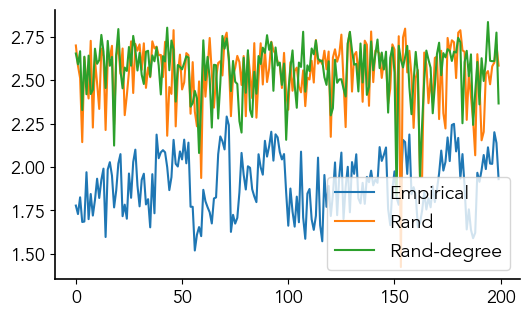

In [43]:
plt.plot(dim_controls_local[0], label='Empirical')
plt.plot(dim_all_deg, label='Rand')
plt.plot(dim_all_rand, label='Rand-degree')

plt.legend()
plt.show()

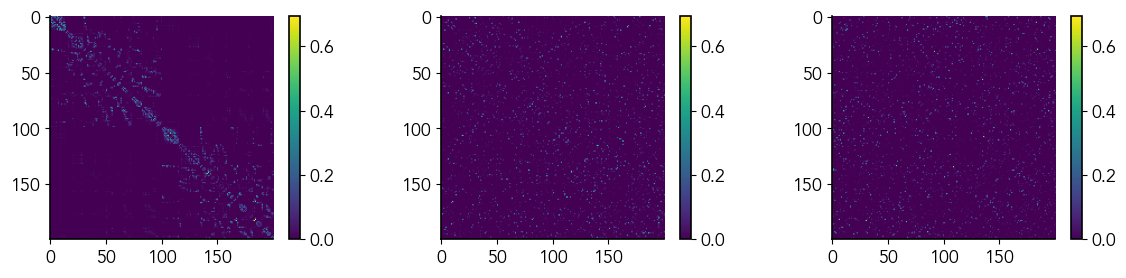

In [22]:
plt.figure(figsize=(12,3))

plt.subplot(1, 3, 1)
plt.imshow(np.log1p(mat))
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(np.log1p(mat_rand))
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(np.log1p(mat_degree))
plt.colorbar()

plt.tight_layout()
plt.show()

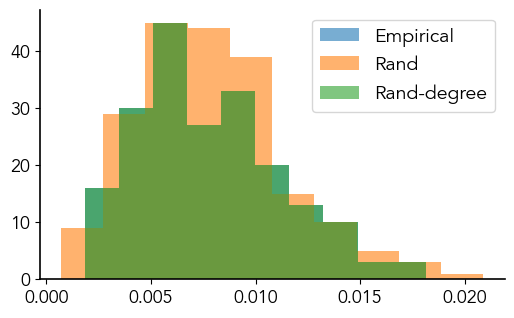

In [28]:
plt.hist(mat.mean(axis=0), alpha=0.6, label='Empirical')
plt.hist(mat_rand.mean(axis=0), alpha=0.6, label='Rand')
plt.hist(mat_degree.mean(axis=0), alpha=0.6, label='Rand-degree')
plt.legend()

plt.show()